In [6]:
# import libraries
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import torch
from torch import nn
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import copy
import sys
sys.path.append("./src")
from autoencoder import Embedding

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

In [7]:
# initialize the NN
model = Embedding()
print(model)

Embedding(
  (fc1): Linear(in_features=784, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=784, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [8]:
## Specify loss and optimization functions
# specify loss function
criterion = nn.L1Loss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.01)

In [9]:
# number of epochs to train the model
n_epochs = 30  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################    
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        target_unfolded = data.view(-1, 28 * 28)
        # calculate the loss
        loss = criterion(output, target_unfolded)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.129211
Epoch: 2 	Training Loss: 0.121196
Epoch: 3 	Training Loss: 0.113073
Epoch: 4 	Training Loss: 0.102817
Epoch: 5 	Training Loss: 0.095747
Epoch: 6 	Training Loss: 0.090332
Epoch: 7 	Training Loss: 0.085969
Epoch: 8 	Training Loss: 0.082052
Epoch: 9 	Training Loss: 0.078848
Epoch: 10 	Training Loss: 0.076415
Epoch: 11 	Training Loss: 0.074354
Epoch: 12 	Training Loss: 0.072701
Epoch: 13 	Training Loss: 0.071310
Epoch: 14 	Training Loss: 0.070067
Epoch: 15 	Training Loss: 0.068947
Epoch: 16 	Training Loss: 0.067888
Epoch: 17 	Training Loss: 0.066763
Epoch: 18 	Training Loss: 0.065891
Epoch: 19 	Training Loss: 0.065125
Epoch: 20 	Training Loss: 0.064361
Epoch: 21 	Training Loss: 0.063636
Epoch: 22 	Training Loss: 0.062948
Epoch: 23 	Training Loss: 0.062350
Epoch: 24 	Training Loss: 0.061822
Epoch: 25 	Training Loss: 0.061340
Epoch: 26 	Training Loss: 0.060891
Epoch: 27 	Training Loss: 0.060469
Epoch: 28 	Training Loss: 0.059987
Epoch: 29 	Training Loss: 0.0

In [10]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    target_unfolded = data.view(-1, 28 * 28)
    # calculate the loss
    loss = criterion(output, target_unfolded)
    # update test loss 
    test_loss += loss.item()*data.size(0)

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

Test Loss: 0.059086



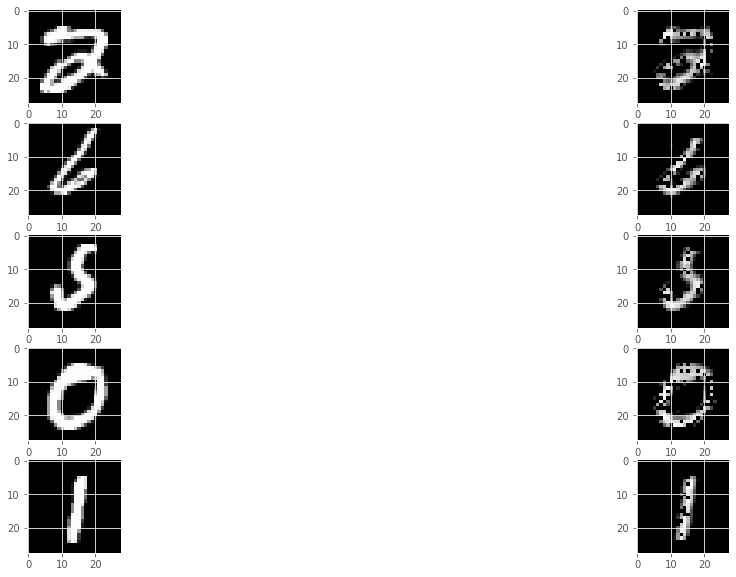

In [11]:
# plot output vs the target images
fig, ax = plt.subplots(5, 2, figsize=(20, 10))
for idx in np.arange(5):
    ax[idx, 0].imshow(np.squeeze(data.view(20, 28, 28).detach().numpy()[idx]), cmap='gray')
    ax[idx, 1].imshow(np.squeeze(output.view(20, 28, 28).detach().numpy()[idx]), cmap='gray')